In [2]:
%matplotlib inline

#%pylab inline
import pandas as pd
import scipy.stats as stats
import scipy.cluster.hierarchy as clust
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Hamda\anaconda3New\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Now read ITO file
reads = pd.read_excel('../InputData/Ito/Count_data_ParalogV1.xlsx')
reads = reads.set_index('Left-sgRNA_Right-sgRNA')
reads.columns

Index(['Aureus_gene', 'Pyogenes_gene', 'pDNA', 'Meljuso_RepA', 'Meljuso_RepB',
       'Meljuso_RepC', 'GI1_004_RepA', 'GI1_004_RepB', 'GI1_004_RepC',
       'MEL202_003_RepA', 'MEL202_003_RepB', 'MEL202_003_RepC', 'PK1_REPA',
       'PK1_REPB', 'PK1_REPC', 'MEWO_REPA', 'MEWO_REPB', 'MEWO_REPC',
       'HS944T_REPA', 'HS944T_REPB', 'HS944T_REPC', 'IPC298_REPA',
       'IPC298_REPB', 'IPC298_REPC', 'A549_REPA', 'A549_REPB', 'A549_REPC',
       'HSC5_REPA', 'HSC5_REPB', 'HSC5_REPC', 'HS936T_REPA', 'HS936T_REPB',
       'HS936T_REPC', 'PATU8988S_REPA', 'PATU8988S_REPB'],
      dtype='object')

In [7]:
numGuides, numSamples = reads.shape

sample_sum = reads.iloc[:,range(2,numSamples)].sum(0)


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


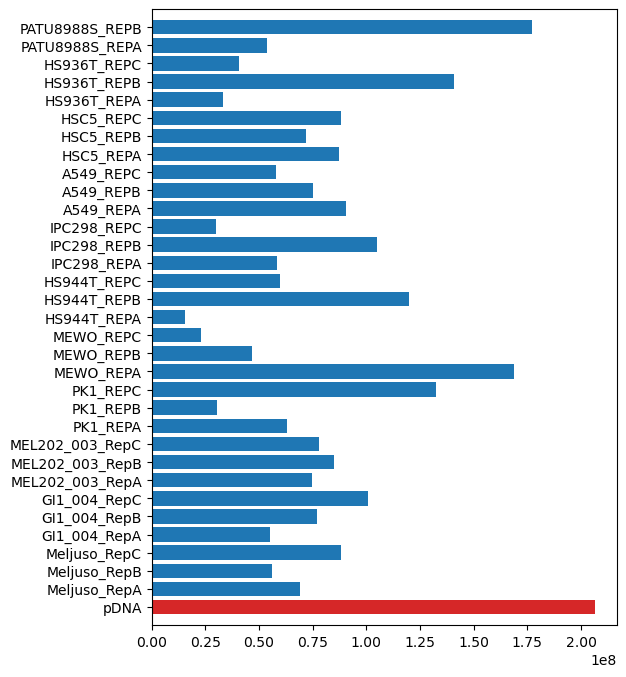

In [8]:
from matplotlib import pyplot
%pylab inline
#import numpy as np
#import matplotlib.pyplot


figure(figsize(6,8))
highlight_index = 0
colors = ['tab:blue'] * len(sample_sum)
colors[highlight_index] = 'tab:red'

barh( arange(len(sample_sum)), sample_sum, align='center', color = colors)

# Create the bar chart

ylim(-1, len(sample_sum)) # len(sample_sum) = 10
yticks(arange(len(sample_sum)), reads.columns.values[2:], rotation=0)

show()

In [9]:
#min(reads.min(axis = 1))
pseudo=5
reads.head()
reads[ reads.columns[2:]] = reads[ reads.columns[2:]] + pseudo
reads.head()


,Aureus_gene,Pyogenes_gene,pDNA,Meljuso_RepA,Meljuso_RepB,Meljuso_RepC,GI1_004_RepA,GI1_004_RepB,GI1_004_RepC,MEL202_003_RepA,...,A549_REPB,A549_REPC,HSC5_REPA,HSC5_REPB,HSC5_REPC,HS936T_REPA,HS936T_REPB,HS936T_REPC,PATU8988S_REPA,PATU8988S_REPB
Left-sgRNA_Right-sgRNA,,,,,,,,,,,,,,,,,,,,,
GCCAAAGGTGCTGACACCGTG_AAATAATGGGAGCCCCCCAG,ABO,A3GALT2,1291,372,375,572,403,282,995,568,...,640,533,835,547,647,147,833,158,309,1144
AGGACGTGTCCATGCGCCGCA_GCGCTGGCAAGACGTGTCGA,ABO,A3GALT2,3435,1439,1239,1931,1120,1945,2727,1755,...,1799,1331,1940,1476,1988,855,2340,1024,1123,3765
AGGACGTGTCCATGCGCCGCA_AAATAATGGGAGCCCCCCAG,ABO,A3GALT2,2007,775,601,964,608,728,658,806,...,1130,1012,1093,1083,1487,221,1797,816,594,1784
CAGGGTGCCGAACAGCGGAGT_ACACGTAGTACATCACGCTC,ABO,A3GALT2,4827,1981,1334,2265,876,894,968,1853,...,2121,1647,1656,1149,1815,519,2598,1104,1419,3361
GCCAAAGGTGCTGACACCGTG_ACACGTAGTACATCACGCTC,ABO,A3GALT2,2108,810,586,888,251,330,585,978,...,639,578,676,568,924,518,881,445,430,1682


In [10]:
meanReads = reads.iloc[:,range(2,numSamples)].mean(0) # colmean
#meanReads


In [12]:
normed = pd.DataFrame(index=reads.index, columns=reads.columns) # empty data frame
normed['Aureus_gene'] = reads.loc[:, 'Aureus_gene']
normed['Pyogenes_gene'] = reads.loc[:, 'Pyogenes_gene']
normed.head()
#each replcate has been normalised using its own mean read count
normed[ normed.columns[2:] ] =   (reads.iloc[:, range(2, numSamples)] ) / np.tile(meanReads.values, [numGuides, 1]) * 500  # normalize to mean 500 read


In [13]:
fc = pd.DataFrame(index=reads.index, columns=reads.columns[reads.columns != 'pDNA']) # non-normalised
fc['Aureus_gene'] = reads.iloc[:, 0]  # first column is gene name
fc['Pyogenes_gene'] = reads.iloc[:, 1] 
#fc.head()
numFCsamples = fc.shape[1]-2  # number of columns for which to calculate FC
numFCsamples

fc.head()
fc[ fc.columns[2:] ] = log2( (normed[ normed.columns[3:]]) / np.tile( normed[ normed.columns[2]], [numFCsamples, 1]).T )
fc.head()


,Aureus_gene,Pyogenes_gene,Meljuso_RepA,Meljuso_RepB,Meljuso_RepC,GI1_004_RepA,GI1_004_RepB,GI1_004_RepC,MEL202_003_RepA,MEL202_003_RepB,...,A549_REPB,A549_REPC,HSC5_REPA,HSC5_REPB,HSC5_REPC,HS936T_REPA,HS936T_REPB,HS936T_REPC,PATU8988S_REPA,PATU8988S_REPB
Left-sgRNA_Right-sgRNA,,,,,,,,,,,,,,,,,,,,,
GCCAAAGGTGCTGACACCGTG_AAATAATGGGAGCCCCCCAG,ABO,A3GALT2,-0.227968,0.083955,0.050362,0.215133,-0.779334,0.654842,0.275959,-0.198637,...,0.434535,0.551575,0.606672,0.278528,0.221492,-0.513363,-0.080648,-0.695976,-0.135119,0.043977
AGGACGTGTCCATGCGCCGCA_GCGCTGGCAAGACGTGTCGA,ABO,A3GALT2,0.311903,0.396347,0.393802,0.277959,0.594848,0.697567,0.491646,0.715181,...,0.513765,0.460057,0.411059,0.298787,0.429151,0.614924,-0.002349,0.588423,0.314739,0.350718
AGGACGTGTCCATGCGCCGCA_AAATAATGGGAGCCCCCCAG,ABO,A3GALT2,0.194374,0.127877,0.166829,0.171873,-0.047642,-0.578319,0.144296,0.480535,...,0.618162,0.840026,0.358566,0.627397,0.785508,-0.561684,0.392002,1.036117,0.171185,0.048454
CAGGGTGCCGAACAGCGGAGT_ACACGTAGTACATCACGCTC,ABO,A3GALT2,0.282249,0.012113,0.133149,-0.567354,-1.017392,-1.287485,0.079221,-0.039165,...,0.260498,0.276571,-0.308111,-0.553343,-0.193013,-0.596082,-0.342273,0.206130,0.161439,-0.303858
GCCAAAGGTGCTGACACCGTG_ACACGTAGTACATCACGCTC,ABO,A3GALT2,0.187266,0.020579,-0.022479,-1.175345,-1.259949,-0.818804,0.352517,0.368063,...,-0.275107,-0.038876,-0.405467,-0.374507,0.028234,0.596387,-0.707209,0.090519,-0.365775,-0.107318


In [14]:
## AAVS1 is control in this study
fc_base = pd.DataFrame(index=fc.index, columns=fc.columns) # non-normalised
fc_base.iloc[:] = fc.iloc[:]


#= 'CTRL'
fc_base.loc[ fc_base['Pyogenes_gene'] == "AAVS1", 'Pyogenes_gene' ] = 'control'
fc_base.loc[ fc_base['Aureus_gene'] == "AAVS1", 'Aureus_gene' ] = 'control'

fc_base.loc[(fc_base['Pyogenes_gene'] == 'control')]
fc_base.rename(columns = {fc_base.columns[0]:'GENE1', fc_base.columns[1]: 'GENE2'}, inplace = True)
fc_base.head()


,GENE1,GENE2,Meljuso_RepA,Meljuso_RepB,Meljuso_RepC,GI1_004_RepA,GI1_004_RepB,GI1_004_RepC,MEL202_003_RepA,MEL202_003_RepB,...,A549_REPB,A549_REPC,HSC5_REPA,HSC5_REPB,HSC5_REPC,HS936T_REPA,HS936T_REPB,HS936T_REPC,PATU8988S_REPA,PATU8988S_REPB
Left-sgRNA_Right-sgRNA,,,,,,,,,,,,,,,,,,,,,
GCCAAAGGTGCTGACACCGTG_AAATAATGGGAGCCCCCCAG,ABO,A3GALT2,-0.227968,0.083955,0.050362,0.215133,-0.779334,0.654842,0.275959,-0.198637,...,0.434535,0.551575,0.606672,0.278528,0.221492,-0.513363,-0.080648,-0.695976,-0.135119,0.043977
AGGACGTGTCCATGCGCCGCA_GCGCTGGCAAGACGTGTCGA,ABO,A3GALT2,0.311903,0.396347,0.393802,0.277959,0.594848,0.697567,0.491646,0.715181,...,0.513765,0.460057,0.411059,0.298787,0.429151,0.614924,-0.002349,0.588423,0.314739,0.350718
AGGACGTGTCCATGCGCCGCA_AAATAATGGGAGCCCCCCAG,ABO,A3GALT2,0.194374,0.127877,0.166829,0.171873,-0.047642,-0.578319,0.144296,0.480535,...,0.618162,0.840026,0.358566,0.627397,0.785508,-0.561684,0.392002,1.036117,0.171185,0.048454
CAGGGTGCCGAACAGCGGAGT_ACACGTAGTACATCACGCTC,ABO,A3GALT2,0.282249,0.012113,0.133149,-0.567354,-1.017392,-1.287485,0.079221,-0.039165,...,0.260498,0.276571,-0.308111,-0.553343,-0.193013,-0.596082,-0.342273,0.20613,0.161439,-0.303858
GCCAAAGGTGCTGACACCGTG_ACACGTAGTACATCACGCTC,ABO,A3GALT2,0.187266,0.020579,-0.022479,-1.175345,-1.259949,-0.818804,0.352517,0.368063,...,-0.275107,-0.038876,-0.405467,-0.374507,0.028234,0.596387,-0.707209,0.090519,-0.365775,-0.107318


In [15]:
## Merge replicates by mean
cells = list([ 'Meljuso', 'GI1_004',
       'MEL202_003', 'PK1', 'MEWO',
       'HS944T', 'IPC298', 'A549',
       'HSC5', 'HS936T', 'PATU8988S'])
cols = list(['GENE1']) + list( ['GENE2']) + cells
cols
fc_merge = pd.DataFrame( columns=cols, index=fc_base.index, dtype=float)
fc_merge.GENE1 = fc_base.GENE1
fc_merge.GENE2 = fc_base.GENE2

for cell in cells:
    samples = [x for x in fc_base.columns if cell in x]
    fc_merge[cell] = fc[ samples ].mean(1)

fc_merge

,GENE1,GENE2,Meljuso,GI1_004,MEL202_003,PK1,MEWO,HS944T,IPC298,A549,HSC5,HS936T,PATU8988S
Left-sgRNA_Right-sgRNA,,,,,,,,,,,,,
GCCAAAGGTGCTGACACCGTG_AAATAATGGGAGCCCCCCAG,ABO,A3GALT2,-0.031217,0.030214,0.077281,0.023861,0.454493,-0.423865,0.152925,0.574197,0.368898,-0.429996,-0.045571
AGGACGTGTCCATGCGCCGCA_GCGCTGGCAAGACGTGTCGA,ABO,A3GALT2,0.367351,0.523458,0.514429,0.853719,-0.099248,0.324782,-0.031615,0.585048,0.379666,0.400333,0.332729
AGGACGTGTCCATGCGCCGCA_AAATAATGGGAGCCCCCCAG,ABO,A3GALT2,0.163027,-0.151363,0.399964,0.095955,0.108246,0.301705,0.014979,0.729342,0.590490,0.288812,0.109819
CAGGGTGCCGAACAGCGGAGT_ACACGTAGTACATCACGCTC,ABO,A3GALT2,0.142503,-0.957410,0.041471,-0.264568,0.089243,-0.058650,-0.645062,0.261031,-0.351489,-0.244075,-0.071209
GCCAAAGGTGCTGACACCGTG_ACACGTAGTACATCACGCTC,ABO,A3GALT2,0.061789,-1.084699,0.314445,-1.423550,-0.061259,0.100246,-0.411309,-0.093444,-0.250580,-0.006767,-0.236547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CACAGAAGTGACGTCAATAGT_AGGGAGACATCCGTCGGAGA,ZXDC,control,0.549133,0.196367,0.054088,0.820565,0.278527,0.345643,0.559011,0.307161,0.153820,0.122789,0.236809
CCCACCTAGGCACAAAGCCGT_AGGGAGACATCCGTCGGAGA,ZXDC,control,0.664080,0.287508,0.138273,0.508569,0.228916,0.365126,0.381174,-0.181308,0.377528,0.602588,-0.052120
CTGAGCGGATCCTCCCCGTGT_ACCTGCAGAACCACTAGCAT,control,ZXDC,0.010645,0.068013,0.047090,0.117182,0.367216,0.245086,-0.592650,0.245994,-0.078159,0.114626,0.370005


In [16]:
is_ctrl = where( (fc_merge.GENE1=='control') | (fc_merge.GENE2=='control') )[0]

is_ctrl1 = where( fc_merge.GENE1=='control' )[0]
is_ctrl2 = where( fc_merge.GENE2=='control' )[0]


smf_gene1 = fc_merge.iloc[is_ctrl2].groupby('GENE1').mean(numeric_only = True) # calculate means of multiple runs of same gene
smf_gene2 = fc_merge.iloc[is_ctrl1].groupby('GENE2').mean(numeric_only = True)


smf_guide1 = fc_merge.iloc[is_ctrl2].groupby('GENE1')
smf_guide2 = fc_merge.iloc[is_ctrl1].groupby('GENE2')


In [17]:
smf_gene = smf_gene1.join(smf_gene2, lsuffix='_Aposn', rsuffix='_Bposn')
smf_gene # so this dataset has CTRL-GENE as A_549_Bposn and GENE-CTRL a sA_549_APosn

len(smf_gene)
smf_gene

,Meljuso_Aposn,GI1_004_Aposn,MEL202_003_Aposn,PK1_Aposn,MEWO_Aposn,HS944T_Aposn,IPC298_Aposn,A549_Aposn,HSC5_Aposn,HS936T_Aposn,...,GI1_004_Bposn,MEL202_003_Bposn,PK1_Bposn,MEWO_Bposn,HS944T_Bposn,IPC298_Bposn,A549_Bposn,HSC5_Bposn,HS936T_Bposn,PATU8988S_Bposn
GENE1,,,,,,,,,,,,,,,,,,,,,
A3GALT2,0.618374,0.026284,0.212817,0.407456,0.260707,0.471937,0.126012,-0.223136,0.415398,0.302664,...,0.261762,0.414837,0.244828,0.129287,0.015792,0.154808,0.333106,0.146906,0.210835,0.131806
AADAC,0.040893,0.018214,0.127196,0.157615,0.173779,0.009021,0.256282,-0.516061,-0.087008,-0.201056,...,0.363116,0.519699,0.152661,0.375892,0.335970,0.422292,0.437089,0.133989,0.252617,0.251137
AADACL2,-0.050773,0.231290,0.184307,-0.097041,-0.111553,0.001214,0.069180,-0.516253,0.120985,0.044523,...,0.669911,0.656352,0.335347,0.516000,0.585280,0.295004,0.644138,0.775123,0.490311,0.411799
AADACL3,0.121636,-0.285146,0.066504,0.140799,-0.099100,-0.301912,-0.094509,-0.546934,0.078366,0.128917,...,0.242688,0.429220,0.173184,0.326106,0.330917,0.177708,0.482089,0.032394,0.505887,0.469092
AADACL4,0.235834,-0.197286,0.380428,0.108684,0.012692,0.252708,0.383556,-0.133569,0.306580,0.265862,...,0.172743,0.302986,0.243762,0.334077,0.163499,0.194661,0.353586,0.099880,0.666467,0.122087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNRF2,-0.052105,0.252935,-0.084342,0.119576,0.178097,0.210446,-0.108524,-0.444105,0.240563,0.424774,...,0.394556,0.336120,0.270229,0.213435,0.520032,0.303925,0.577682,0.491679,0.601865,0.474527
ZNRF4,0.152304,0.088390,0.127304,-0.307813,0.046051,0.045849,0.337521,-0.474592,0.193341,-0.443853,...,0.142769,0.341802,0.143483,0.198669,0.175504,0.178480,0.597585,0.585045,0.046096,0.199636
ZXDA,-0.236901,0.082813,0.361749,0.453909,0.145873,0.078977,0.112492,-0.265765,0.083169,0.158634,...,0.606528,0.551774,0.362828,0.291218,0.334549,0.581547,0.509879,0.609622,-0.182389,0.248563


Meljuso: PearsonRResult(statistic=0.618497536067643, pvalue=0.0)
GI1_004: PearsonRResult(statistic=0.6043302965809056, pvalue=0.0)
MEL202_003: PearsonRResult(statistic=0.5970048518212895, pvalue=1.95053827e-316)
PK1: PearsonRResult(statistic=0.588419306137029, pvalue=3.008643977507687e-305)
MEWO: PearsonRResult(statistic=0.4903550588085953, pvalue=2.8035501467487095e-198)
HS944T: PearsonRResult(statistic=0.6156632887188959, pvalue=0.0)
IPC298: PearsonRResult(statistic=0.6341756596199059, pvalue=0.0)
A549: PearsonRResult(statistic=0.5398030753107326, pvalue=8.556136248685243e-248)
HSC5: PearsonRResult(statistic=0.5344058817891545, pvalue=5.5446920469962495e-242)
HS936T: PearsonRResult(statistic=0.5571930547861813, pvalue=2.9470138118053734e-267)
PATU8988S: PearsonRResult(statistic=0.607731697906238, pvalue=0.0)


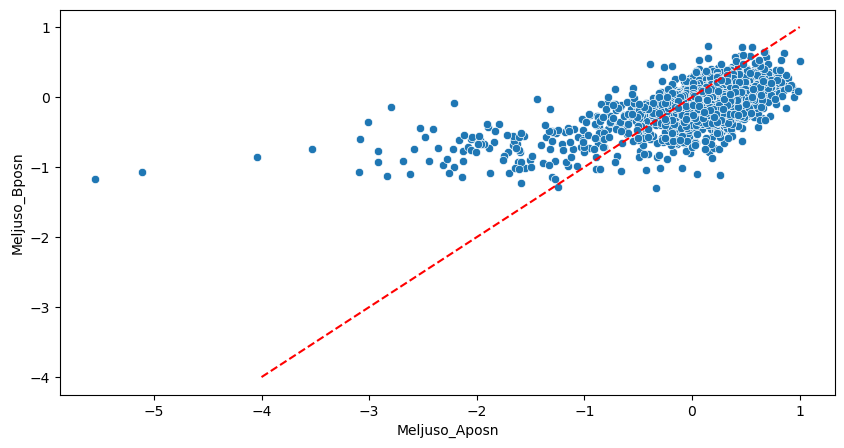

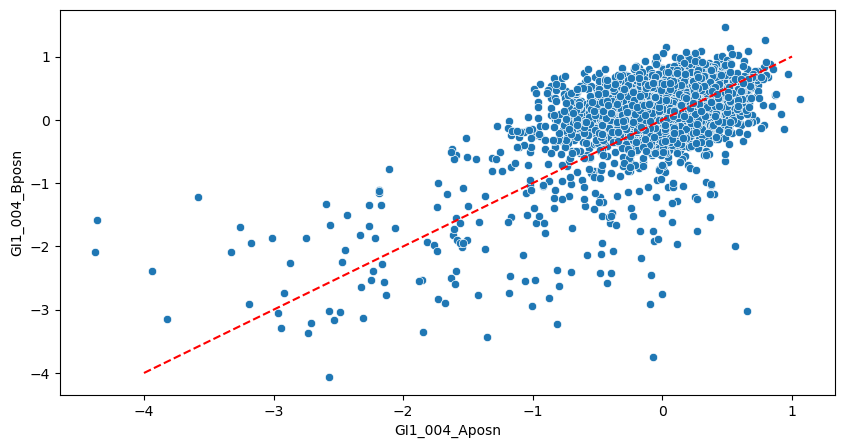

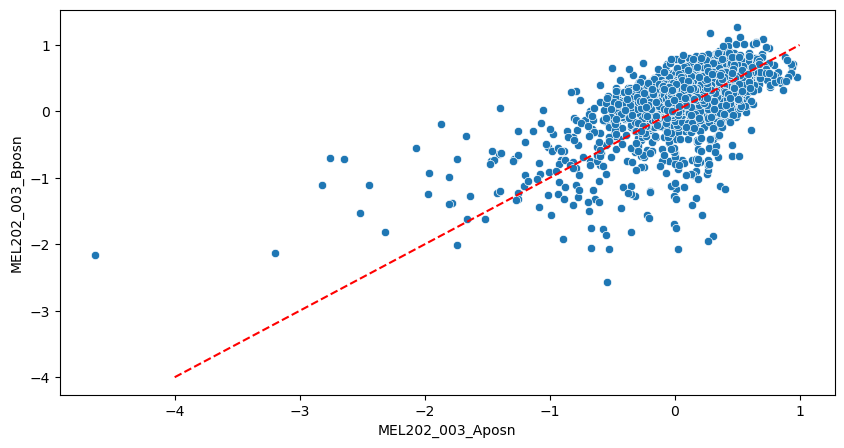

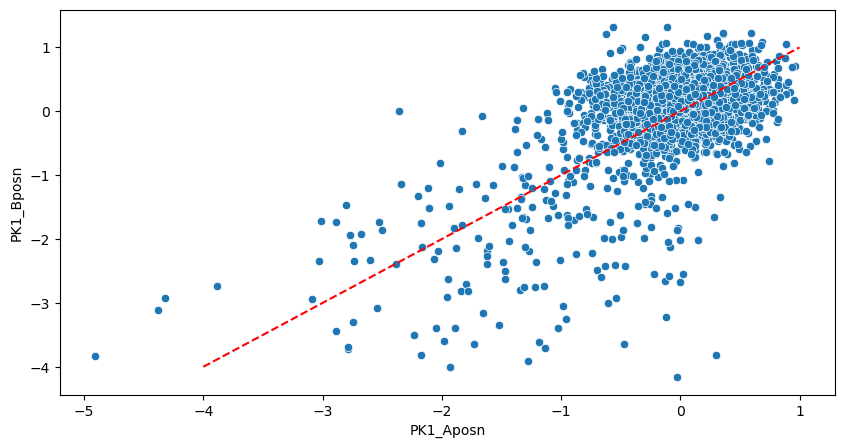

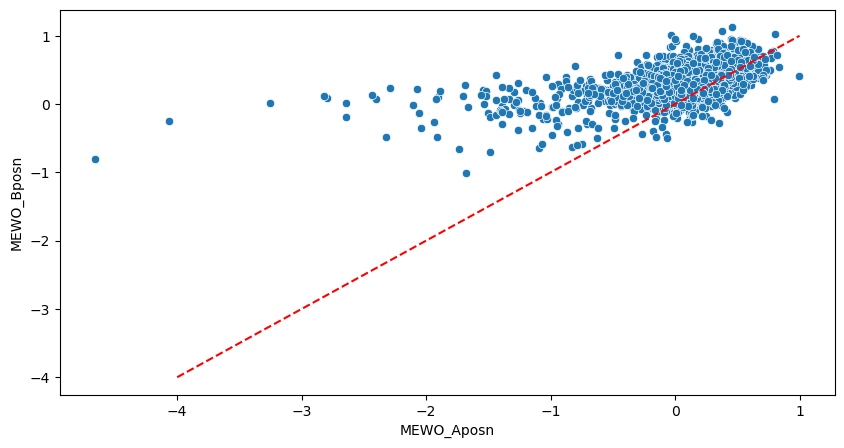

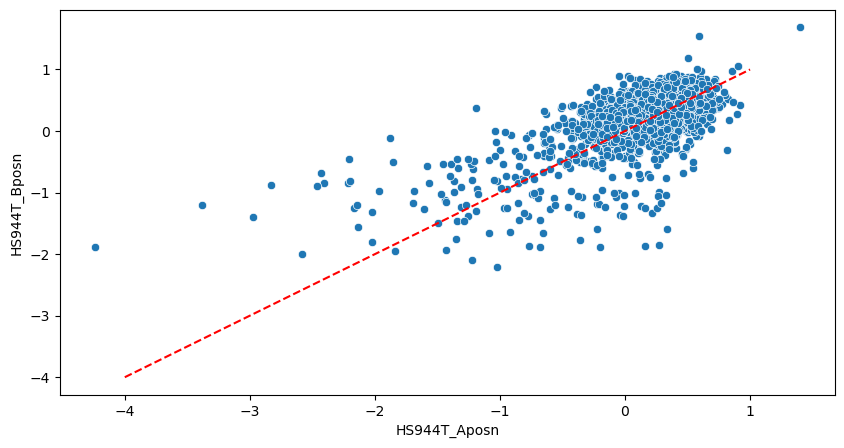

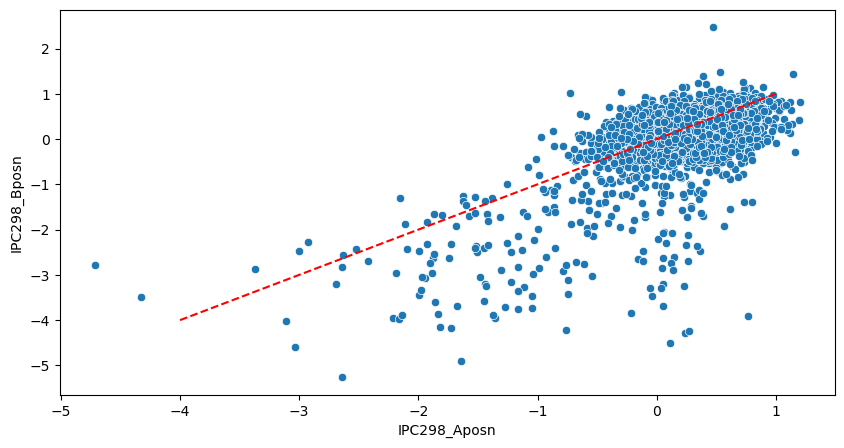

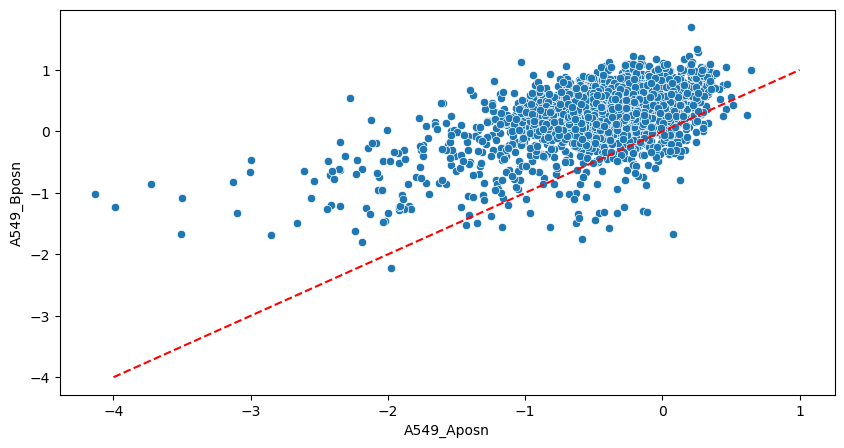

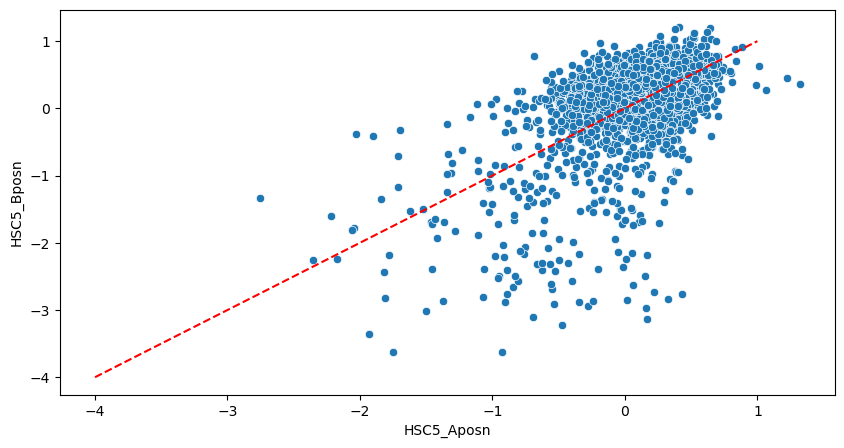

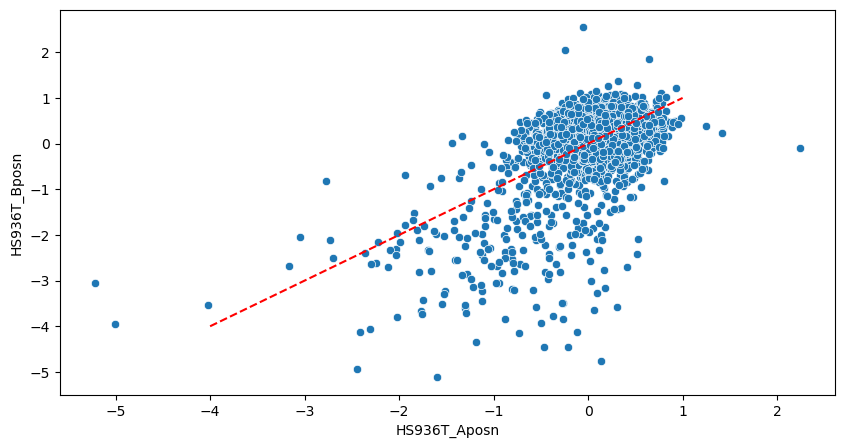

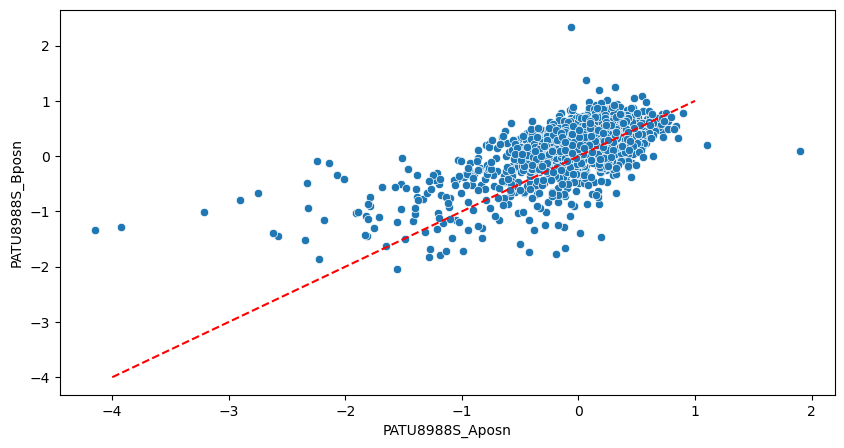

In [18]:
for cell in cells:
    f, ax = pyplot.subplots(figsize=(10,5))
    sns.scatterplot(data=smf_gene, x=cell + '_Aposn',y=cell + '_Bposn', ax=ax)
    plot([-4,1],[-4,1],'r--')
    print(cell + ': ' + str( stats.pearsonr( smf_gene[ cell + '_Aposn' ], smf_gene[cell + '_Bposn' ])) ) 

In [19]:
for cell in cells:
    smf_gene[cell] = smf_gene[ [cell + '_Aposn', cell + '_Bposn'] ].mean(1)
    smf_gene.drop( [cell + '_Aposn', cell + '_Bposn'], axis=1, inplace=True )
    
smf_gene

,Meljuso,GI1_004,MEL202_003,PK1,MEWO,HS944T,IPC298,A549,HSC5,HS936T,PATU8988S
GENE1,,,,,,,,,,,
A3GALT2,0.271661,0.144023,0.313827,0.326142,0.194997,0.243865,0.140410,0.054985,0.281152,0.256749,0.233414
AADAC,0.010092,0.190665,0.323447,0.155138,0.274836,0.172495,0.339287,-0.039486,0.023491,0.025780,0.154369
AADACL2,0.081462,0.450600,0.420330,0.119153,0.202224,0.293247,0.182092,0.063943,0.448054,0.267417,0.224638
AADACL3,0.050585,-0.021229,0.247862,0.156991,0.113503,0.014502,0.041599,-0.032423,0.055380,0.317402,0.140454
AADACL4,0.029148,-0.012272,0.341707,0.176223,0.173385,0.208103,0.289108,0.110008,0.203230,0.466164,0.179906
...,...,...,...,...,...,...,...,...,...,...,...
ZNRF2,-0.185150,0.323746,0.125889,0.194903,0.195766,0.365239,0.097701,0.066789,0.366121,0.513320,0.238392
ZNRF4,0.124199,0.115580,0.234553,-0.082165,0.122360,0.110676,0.258000,0.061496,0.389193,-0.198879,0.104955
ZXDA,-0.117122,0.344671,0.456761,0.408369,0.218545,0.206763,0.347019,0.122057,0.346395,-0.011877,0.068184


In [20]:
pairs = fc_merge[(fc_merge['GENE1'] != "control") & (fc_merge['GENE2'] != "control")] # These are all experiments without control,
pairs =  pairs[["GENE1", "GENE2"]]
pairs =pairs.drop_duplicates(keep='first')
pairs.insert(2, "GENE1_GENE2",np.tile("ZZ",len(pairs)), True)



pairs.columns
for ind in pairs.index:
    g1 = pairs.loc[ind, 'GENE1']
    g2 = pairs.loc[ind, 'GENE2']
    newval = g1 + "_" + g2
    if g1 > g2:
        newval = g2 + "_" + g1
    pairs.loc[ind,"GENE1_GENE2"] = newval

   
pairs
print(len(pairs))
pairs.drop_duplicates(subset="GENE1_GENE2", keep="first",inplace = True)
print(len(pairs))


10130
5065


In [30]:
fc_merge.columns
dLFC = pd.DataFrame( index=list(pairs.GENE1 + "_" + pairs.GENE2), columns=fc_merge.columns[2:], dtype=float)


,Meljuso,GI1_004,MEL202_003,PK1,MEWO,HS944T,IPC298,A549,HSC5,HS936T,PATU8988S
ABO_A3GALT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBGT1_A3GALT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GLT6D1_A3GALT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABO_GBGT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GLT6D1_ABO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
ATP6V1G1_ATP6V1G2-DDX39B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATP6V1G1_ATP6V1G3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATP6V1G3_ATP6V1G2-DDX39B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATP6V1G2_ATP6V1G2-DDX39B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
smf = smf_gene
for pair_idx in pairs.index:
    g1 = pairs.loc[pair_idx].GENE1
    g2 = pairs.loc[pair_idx].GENE2
    expt_idx  = list( where( ( (fc_merge.GENE1==g1) & (fc_merge.GENE2==g2) )  | ( (fc_merge.GENE1==g2) & (fc_merge.GENE2==g1)  ))[0] )
    
    if ( len(expt_idx)==0 ):
        continue
    smf_sum = smf.loc[g1] + smf.loc[g2]
    expt = fc_merge.iloc[ expt_idx ]
    genepair = g1 + "_" + g2
    dLFC.loc[genepair] = expt.median(0,numeric_only=True) - smf_sum

In [32]:
zdLFC = pd.DataFrame( index=dLFC.index, columns=dLFC.columns, dtype=float ) 


,Meljuso,GI1_004,MEL202_003,PK1,MEWO,HS944T,IPC298,A549,HSC5,HS936T,PATU8988S
ABO_A3GALT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBGT1_A3GALT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GLT6D1_A3GALT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABO_GBGT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GLT6D1_ABO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:

percentile = 2.5
for col in zdLFC.columns:
    #print(col)
    top = np.percentile( dLFC.loc[:,col], percentile)
    bot = np.percentile( dLFC.loc[:,col], 100-percentile)
    #print(top,bot)
    mu = dLFC.iloc[ where( (dLFC[col]>top) & (dLFC[col]<bot))[0] ][col].mean() # This is because our dist is truncated normal
    std = dLFC.iloc[ where( (dLFC[col]>top) & (dLFC[col]<bot))[0] ][col].std()
    #print(mu, std)
    zdLFC[col] = (dLFC[col] - mu) / std

In [36]:
zdLFC

,Meljuso,GI1_004,MEL202_003,PK1,MEWO,HS944T,IPC298,A549,HSC5,HS936T,PATU8988S
ABO_A3GALT2,0.140825,-0.185618,0.608270,0.075492,0.999869,-0.186228,0.621401,1.477406,0.482024,0.467853,-0.009664
GBGT1_A3GALT2,0.799537,0.133986,1.310639,-0.316279,1.161242,0.148810,-0.241038,1.442006,0.966367,0.322334,0.834030
GLT6D1_A3GALT2,0.204638,0.021932,0.825974,-0.226692,0.257550,0.041823,0.681757,0.646758,-0.141689,0.409773,0.444986
ABO_GBGT1,1.220497,0.278938,0.910098,0.591951,0.929213,-0.324116,0.165222,0.324962,0.632563,1.143050,0.821641
GLT6D1_ABO,0.448619,0.051253,0.219624,0.316129,-0.148738,-0.745966,0.833978,0.054062,-0.439164,0.796077,0.222335
...,...,...,...,...,...,...,...,...,...,...,...
ATP6V1G1_ATP6V1G2-DDX39B,1.915006,-0.699969,-1.268442,1.936216,1.212629,-0.041208,0.731702,0.014848,0.049683,-1.227716,2.172902
ATP6V1G1_ATP6V1G3,1.653704,-0.033045,-1.161602,2.609435,1.236395,-1.841733,1.625707,-0.492700,-0.290799,-0.426634,0.974985
ATP6V1G3_ATP6V1G2-DDX39B,0.264456,0.356914,0.879407,-0.171680,0.809023,0.775689,1.185992,0.279938,0.689580,1.067024,0.210300
ATP6V1G2_ATP6V1G2-DDX39B,0.118832,1.353720,1.115467,0.354115,0.852423,1.675304,1.071759,0.613774,1.158176,-0.269564,-0.050977


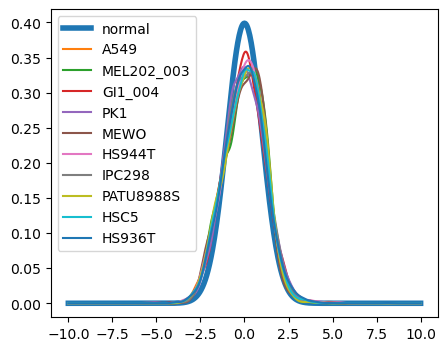

In [37]:
## Representation of a kernel-density estimate using Gaussian kernels.Kernel density estimation is a way to estimate
# the probability density function (PDF) of a random variable in a non-parametric way. gaussian_kde works for both 
# uni-variate and multi-variate data. It includes automatic bandwidth determination. The estimation works best for
# a unimodal distribution; bimodal or multi-modal distributions tend to be oversmoothed.
xx = linspace(-10,10,500)
kde_a549 = stats.gaussian_kde( zdLFC.A549 )
kde_MEL202_003 = stats.gaussian_kde( zdLFC.MEL202_003 )
kde_GI1_004 = stats.gaussian_kde( zdLFC.GI1_004 )
kde_PK1 = stats.gaussian_kde( zdLFC.PK1 )

kde_MEWO = stats.gaussian_kde( zdLFC.MEWO )

kde_GI1_004 = stats.gaussian_kde( zdLFC.GI1_004 )

kde_HS944T = stats.gaussian_kde( zdLFC.HS944T )

kde_IPC298 = stats.gaussian_kde( zdLFC.IPC298 )


kde_HSC5= stats.gaussian_kde( zdLFC.HSC5 )
kde_HS936T= stats.gaussian_kde( zdLFC.HS936T )
kde_PATU8988S= stats.gaussian_kde( zdLFC.PATU8988S )
#kde_HSC5= stats.gaussian_kde( zdLFC.HSC5 )
figure( figsize(5,4) )
plot( xx, stats.norm.pdf( xx), label='normal', linewidth=4 )
plot( xx, kde_a549.evaluate(xx), label='A549')
plot( xx, kde_MEL202_003.evaluate(xx), label='MEL202_003')
plot( xx, kde_GI1_004.evaluate(xx), label='GI1_004')
plot( xx, kde_PK1.evaluate(xx), label='PK1')
plot( xx, kde_MEWO.evaluate(xx), label='MEWO')
plot( xx, kde_HS944T.evaluate(xx), label='HS944T')
plot( xx, kde_IPC298.evaluate(xx), label='IPC298')
plot( xx, kde_PATU8988S.evaluate(xx), label='PATU8988S')
plot( xx, kde_HSC5.evaluate(xx), label='HSC5')
plot( xx, kde_HS936T.evaluate(xx), label='HS936T')


legend(loc=2)
#savefig('normfit-of-zdLFC.pdf')
show()


In [39]:
def reindex_alphbetically(df):
    result = []
    for index, row in df.iterrows():
        a, b = index.split('_')
        if a < b:
            result.append(f'{a}_{b}')
        else:
            result.append(f'{b}_{a}')
    
    
    return(result)


zdLFC.index = reindex_alphbetically(zdLFC)
zdLFC.to_csv("zdLFC Output/ITO.csv", index=True)  # Set index=False to exclude the index column